# Analysis of Customer Loans Data 

Now I can start anaylsis on the cleaned data. 

In [12]:
from transformations import DataTransform, DataFrameInfo, Plotter
import pandas as pd

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
loans_df = pd.read_csv('loan_payments_transformed.csv')
pd.set_option('display.max_columns', None)
loans_df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,89.442719,89.442719,89.442719,36.0,7.49,15.774029,A,A4,6.0,MORTGAGE,10.736397,Not Verified,2021-01-01,Current,n,credit_card,19.54,1.414214,1987-10-01,1.0,3.464102,5.196152,8.617889,54.612361,54.612361,49.702113,6.238735,0.0,0.0,0.0,2022-01-01,5.516730,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,114.891253,114.891253,114.891253,36.0,6.99,20.187125,A,A3,10.0,RENT,10.819778,Not Verified,2021-01-01,Current,n,credit_card,24.20,0.000000,2001-09-01,0.0,3.872983,5.567764,9.116341,69.893562,69.893562,64.009140,6.669422,0.0,0.0,0.0,2022-01-01,6.010090,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,126.491106,126.491106,126.491106,36.0,7.49,22.307622,A,A4,9.0,MORTGAGE,11.210644,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0.000000,1998-09-01,0.0,2.645751,4.242641,0.000000,129.709445,129.709445,126.491106,6.714826,0.0,0.0,0.0,2021-10-01,9.461112,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,122.474487,122.474487,122.474487,36.0,14.31,22.692069,C,C4,2.0,RENT,10.645425,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0.000000,2008-06-01,0.0,2.449490,3.605551,0.000000,126.283293,126.283293,122.474487,6.853795,0.0,0.0,0.0,2021-06-01,9.539620,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,122.474487,122.474487,122.474487,36.0,6.03,21.366797,A,A1,11.0,MORTGAGE,11.884489,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0.000000,2002-04-01,1.0,4.795832,7.071068,9.239654,73.982836,73.982836,68.574995,6.647598,0.0,0.0,0.0,2022-01-01,6.123676,2022-01-01,0.0,1,INDIVIDUAL


Summarise what percentage of the loans have been currently recovered compared to the total amount to be paid over the loans term including interest.
Additionally calculate how much will be paid back in 6 months time with interest. Visualise your results on an appropriate graph.

cols I need:
instalment - to be paid per month 
term - number of months in term 
total_payment - payments received


12.758535546172231


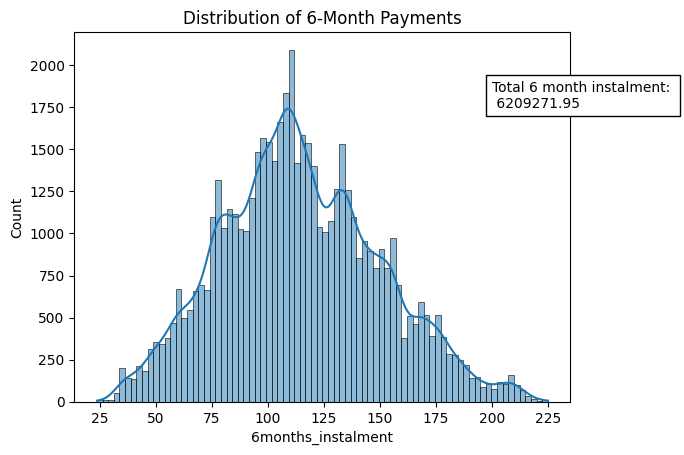

In [ ]:
loans_df['total_to_be_paid'] = loans_df['instalment']*loans_df['term']

print(loans_df['total_payment'].sum()/loans_df['total_to_be_paid'].sum()*100)

loans_df['6months_instalment'] = loans_df['instalment']*6


sns.histplot(data=loans_df, x='6months_instalment', kde=True)
plt.title('Distribution of 6-Month Payments')
total_value = loans_df['instalment'].sum()*6
plt.text(200, 1750, f"Total 6 month instalment: \n {total_value:.2f}", bbox=dict(facecolor='white'))
plt.show()